# **Engineering Hydrology Interpolation and Calculation Code**
**Caclulation of Potential Evapotranspiration**

**Name:** Arjun Adhikari
          
**Date:** 08th June, 2024. 

This document comprises the calculation of the average monthly PET from closed grassland of Tribhuvan Airport (Latitude=27°48' and longitude = 85°22', elevation = 1350m with the given weather data)

In [84]:
#reading datas from excel file
data_ew = pd.read_excel("hydrology.xlsx",sheet_name=0)
data_ha = pd.read_excel("hydrology.xlsx", sheet_name=1)
data_n = pd.read_excel("hydrology.xlsx", sheet_name=2)
data_airport = pd.read_excel("hydrology.xlsx", sheet_name=3)

In [65]:
data_ew

,Temp,ew,A
0,0.0,4.58,0.30
1,5.0,6.54,0.45
2,7.5,7.78,0.54
3,10.0,9.21,0.60
4,12.5,10.87,0.71
5,15.0,12.79,0.80
6,17.5,15.00,0.95
7,20.0,17.54,1.05
8,22.5,20.44,1.24
9,25.0,23.76,1.40


In [66]:
data_ha

,lat,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
0,0,14.5,15.0,15.2,14.7,13.9,13.4,13.5,14.2,14.9,15.0,14.6,14.3,14.433333
1,10,12.8,13.9,14.8,15.2,15.0,14.8,14.8,15.0,14.9,14.1,13.1,12.4,14.233333
2,20,10.8,12.3,13.9,15.2,15.7,15.8,15.7,15.3,14.4,12.9,11.2,10.3,13.625000
3,30,8.5,10.5,12.7,14.8,16.0,16.5,16.2,15.3,13.5,11.3,9.1,7.9,12.691667
4,40,6.0,8.3,11.0,13.9,15.9,16.7,16.3,14.8,12.2,9.3,6.7,5.4,11.375000
5,50,3.6,5.9,9.1,12.7,15.4,16.7,16.1,13.9,10.5,7.1,4.3,3.0,9.858333


In [67]:
data_n

,lat,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
0,0,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.100000
1,10,11.6,11.8,12.1,12.4,12.6,12.7,12.6,12.4,12.9,11.9,11.7,11.5,12.183333
2,20,11.1,11.5,12.0,12.6,13.1,13.3,13.2,12.8,12.3,11.7,11.2,10.9,12.141667
3,30,10.4,11.1,12.0,12.9,13.7,14.1,13.9,13.2,12.4,11.5,10.6,10.2,12.166667
4,40,9.6,10.7,11.9,13.2,14.4,15.0,14.7,13.8,12.5,11.2,10.0,9.4,12.200000
5,50,8.6,10.1,11.8,13.8,15.4,16.4,16.0,14.5,12.7,10.8,9.1,8.1,12.275000


In [68]:
data_airport

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,MH_data,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
2,NaN,Temp in degree,9.45,11.2,15.5,19.2,21.6,23.2,23.4,23.3,22,19,14.1,10.2,17.679167
3,NaN,RH (%),76,57,45,35,43,77,80,84,77,74,71,65,65.333333
4,NaN,wind speed,1.3,2.2,2.2,2.8,2.8,3.3,2.3,2.4,1.5,1.3,1.8,1.4,2.108333
5,NaN,actual sunshine in hrs(n),8,8.5,9.5,9.4,10.5,11.5,12,11,11.2,10,9.5,9,10.008333


In [69]:
data_airport = data_airport.drop(data_airport.columns[[0]], axis=1)

In [70]:
data_airport

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MH_data,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
2,Temp in degree,9.45,11.2,15.5,19.2,21.6,23.2,23.4,23.3,22,19,14.1,10.2,17.679167
3,RH (%),76,57,45,35,43,77,80,84,77,74,71,65,65.333333
4,wind speed,1.3,2.2,2.2,2.8,2.8,3.3,2.3,2.4,1.5,1.3,1.8,1.4,2.108333
5,actual sunshine in hrs(n),8,8.5,9.5,9.4,10.5,11.5,12,11,11.2,10,9.5,9,10.008333


In [71]:
new_header = data_airport.iloc[1]  # Store the first row as the new header
data_airport = data_airport[2:]  # Take the data less the header row
data_airport.columns = new_header  # Set the header row as the DataFrame header

In [72]:
data_airport

1,MH_data,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
2,Temp in degree,9.45,11.2,15.5,19.2,21.6,23.2,23.4,23.3,22,19,14.1,10.2,17.679167
3,RH (%),76,57,45,35,43,77,80,84,77,74,71,65,65.333333
4,wind speed,1.3,2.2,2.2,2.8,2.8,3.3,2.3,2.4,1.5,1.3,1.8,1.4,2.108333
5,actual sunshine in hrs(n),8,8.5,9.5,9.4,10.5,11.5,12,11,11.2,10,9.5,9,10.008333


In [73]:
#initializing constant and known values
L = 27.8 #latitude in decimal degrees
Rl = 1350 #known elevation
r = .22 #albedo constant
a = .29 * np.cos(np.radians(L)) #constant
b = .52 #constant
sigma = 2.01E-9 #stefan's constant
gamma = .485 #psychrometric constant .485 mm of mercury


In [74]:
# Assuming data_airport is  DataFrame
data = {
    'MH_data': ['Temp in degree', 'RH (%)', 'wind speed', 'actual sunshine in hrs(n)'],
    'Jan': [9.45, 76, 1.3, 8],
    'Feb': [11.2, 57, 2.2, 8.5],
    'Mar': [15.5, 45, 2.2, 9.5],
    'Apr': [19.2, 35, 2.8, 9.4],
    'May': [21.6, 43, 2.8, 10.5],
    'Jun': [23.2, 77, 3.3, 11.5],
    'Jul': [23.4, 80, 2.3, 12],
    'Aug': [23.3, 84, 2.4, 11],
    'Sep': [22, 77, 1.5, 11.2],
    'Oct': [19, 74, 1.3, 10],
    'Nov': [14.1, 71, 1.8, 9.5],
    'Dec': [10.2, 65, 1.4, 9],
    'Avg': [17.679167, 65.333333, 2.108333, 10.008333]
}

data_airport = pd.DataFrame(data)

# Extract monthly data
Ta_months = np.array(data_airport.iloc[0, 1:])  # Temperature in degrees
RH_months = np.array(data_airport.iloc[1, 1:])  # Relative humidity in %
WS_months = np.array(data_airport.iloc[2, 1:])  # Wind speed
SS_months = np.array(data_airport.iloc[3, 1:])  # Sunshine hours in n

# Print the extracted data
print("Monthly Data:")
print("Temperature:", Ta_months)
print("Relative Humidity:", RH_months)
print("Wind Speed:", WS_months)
print("Sunshine Hours:", SS_months)

Monthly Data:
Temperature: [9.45 11.2 15.5 19.2 21.6 23.2 23.4 23.3 22.0 19.0 14.1 10.2 17.679167]
Relative Humidity: [76.0 57.0 45.0 35.0 43.0 77.0 80.0 84.0 77.0 74.0 71.0 65.0 65.333333]
Wind Speed: [1.3 2.2 2.2 2.8 2.8 3.3 2.3 2.4 1.5 1.3 1.8 1.4 2.108333]
Sunshine Hours: [8.0 8.5 9.5 9.4 10.5 11.5 12.0 11.0 11.2 10.0 9.5 9.0 10.008333]


In [75]:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Avg"]

In [76]:
ew_months = []
A_months = []
Ha_months = []
N_months = []

for month in months:
    t = data_airport[month][0]
    t_low = data_ew[["Temp"][0]][(data_ew["Temp"]<=t)].to_list()[-1]
    t_high = data_ew[["Temp"][0]][(data_ew["Temp"]>=t)].to_list()[0]
    
    ew_low = data_ew[["ew"][0]][(data_ew["Temp"]<=t)].to_list()[-1]
    ew_high = data_ew[["ew"][0]][(data_ew["Temp"]>=t)].to_list()[0]
    ew = ew_low + (ew_high-ew_low)*(t-t_low)/(t_high-t_low)
    ew_months.append(ew)
    
    a_low = data_ew[["A"][0]][(data_ew["Temp"]<=t)].to_list()[-1]
    a_high = data_ew[["A"][0]][(data_ew["Temp"]>=t)].to_list()[0]
    a_req = a_low + (a_high-a_low)*(t-t_low)/(t_high-t_low)
    A_months.append(a_req)
    
    lat_low = data_ha["lat"][data_ha["lat"]<=L].to_list()[-1]
    lat_high = data_ha["lat"][data_ha["lat"]>=L].to_list()[0]
    
    ha_low = data_ha[month][data_ha["lat"]<=L].to_list()[-1]
    ha_high = data_ha[month][data_ha["lat"]>=L].to_list()[0]
    ha = ha_low + (ha_high-ha_low)*(L-lat_low)/(lat_high-lat_low)
    Ha_months.append(ha)
    
    N_low = data_n[month][data_n["lat"]<=L].to_list()[-1]
    N_high = data_n[month][data_n["lat"]>=L].to_list()[0]   
    N = N_low + (N_high-N_low)*(L-lat_low)/(lat_high-lat_low)
    N_months.append(N)

print("The interpolated datas are as follows:")
print("ew =", ew_months)
print("A =", A_months)
print("Ha =",Ha_months)
print("N =", N_months)

ew_months = np.array(ew_months)
A_months = np.array(A_months)
Ha_months =np.array(Ha_months)
N_months = np.array(N_months)

The interpolated datas are as follows:
ew = [8.8954, 10.0068, 13.232, 16.7272, 19.396, 21.369600000000002, 21.6352, 21.5024, 19.86, 16.524, 12.098799999999999, 9.3428, 15.182033672]
A = [0.5868, 0.6527999999999999, 0.8300000000000001, 1.018, 1.1716000000000002, 1.2848, 1.2975999999999999, 1.2912, 1.202, 1.01, 0.7676000000000001, 0.6087999999999999, 0.9571666799999999]
Ha = [9.006, 10.896, 12.963999999999999, 14.888, 15.934, 16.346, 16.09, 15.3, 13.698, 11.652000000000001, 9.562, 8.428, 12.897000000000002]
N = [10.554, 11.187999999999999, 12.0, 12.834, 13.568, 13.924, 13.746, 13.112, 12.378, 11.544, 10.732, 10.354, 12.161166666666666]


In [77]:
ea_months = ew_months*RH_months/100 #calculating value of ea from ew
n_by_N = SS_months/N_months  #calculating n/N
sT4 = sigma*(Ta_months+273)**4   #calculating sigma * T^4 for each months
u2 = WS_months/1.944*86400/1000

Hn = Ha_months*(1-r)*(a+b*n_by_N)-sT4*(0.56-0.092*(ea_months)**(0.5))*(0.1+0.9*n_by_N)
Ea = .35*(1+u2/160)*(ew_months-ea_months)
PET = (A_months * Hn + Ea * gamma)/(A_months + gamma)


In [78]:
PET

array([1.2052986840685505, 2.205081486547634, 3.3824425004125556,
       4.654278649532656, 5.296025953409124, 5.483665970712675,
       5.3931366835045695, 4.930573695304668, 4.200186175137865,
       2.93562923870675, 1.8107051166377035, 1.1811798749385671,
       3.388440815731834], dtype=object)

In [79]:
interpolated_data = {months[n]:[ew_months[n], A_months[n], Ha_months[n], N_months[n]] for n in range(len(months))}
df_intp = pd.DataFrame(interpolated_data)
df_intp.to_excel("interpolated.xlsx")

In [80]:
final_data = {months[n]:[ew_months[n], A_months[n], Ha_months[n], N_months[n], ea_months[n], 
                sT4[n], Hn[n], Ea[n], PET[n]] for n in range(len(months))}

final_df = pd.DataFrame(final_data)
col_1 = ["ew", "A", "Ha", "N", "ea", "σT^4", "Hn", "Ea", "PET"]
final_df.insert(0, "MH_Data\Month", col_1, True)

In [81]:
final_df

,MH_Data\Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
0,ew,8.895400,10.006800,13.232000,16.727200,19.396000,21.369600,21.635200,21.502400,19.860000,16.524000,12.098800,9.342800,15.182034
1,A,0.586800,0.652800,0.830000,1.018000,1.171600,1.284800,1.297600,1.291200,1.202000,1.010000,0.767600,0.608800,0.957167
2,Ha,9.006000,10.896000,12.964000,14.888000,15.934000,16.346000,16.090000,15.300000,13.698000,11.652000,9.562000,8.428000,12.897000
3,N,10.554000,11.188000,12.000000,12.834000,13.568000,13.924000,13.746000,13.112000,12.378000,11.544000,10.732000,10.354000,12.161167
4,ea,6.760504,5.703876,5.954400,5.854520,8.340280,16.454592,17.308160,18.062016,15.292200,12.227760,8.590148,6.072820,9.918929
5,σT^4,12.792705,13.112707,13.924491,14.652675,15.140040,15.471637,15.513467,15.492541,15.222435,14.612599,13.656167,12.929123,14.349993
6,Hn,1.360897,2.040674,2.960951,3.648573,4.640685,6.309055,6.481209,6.028766,4.981076,3.362500,1.790905,0.855833,3.625345
7,Ea,1.017041,2.426371,4.103758,6.765223,6.879115,3.297151,2.482038,2.006891,2.264867,2.046681,1.842042,1.589574,2.920901
8,PET,1.205299,2.205081,3.382443,4.654279,5.296026,5.483666,5.393137,4.930574,4.200186,2.935629,1.810705,1.181180,3.388441


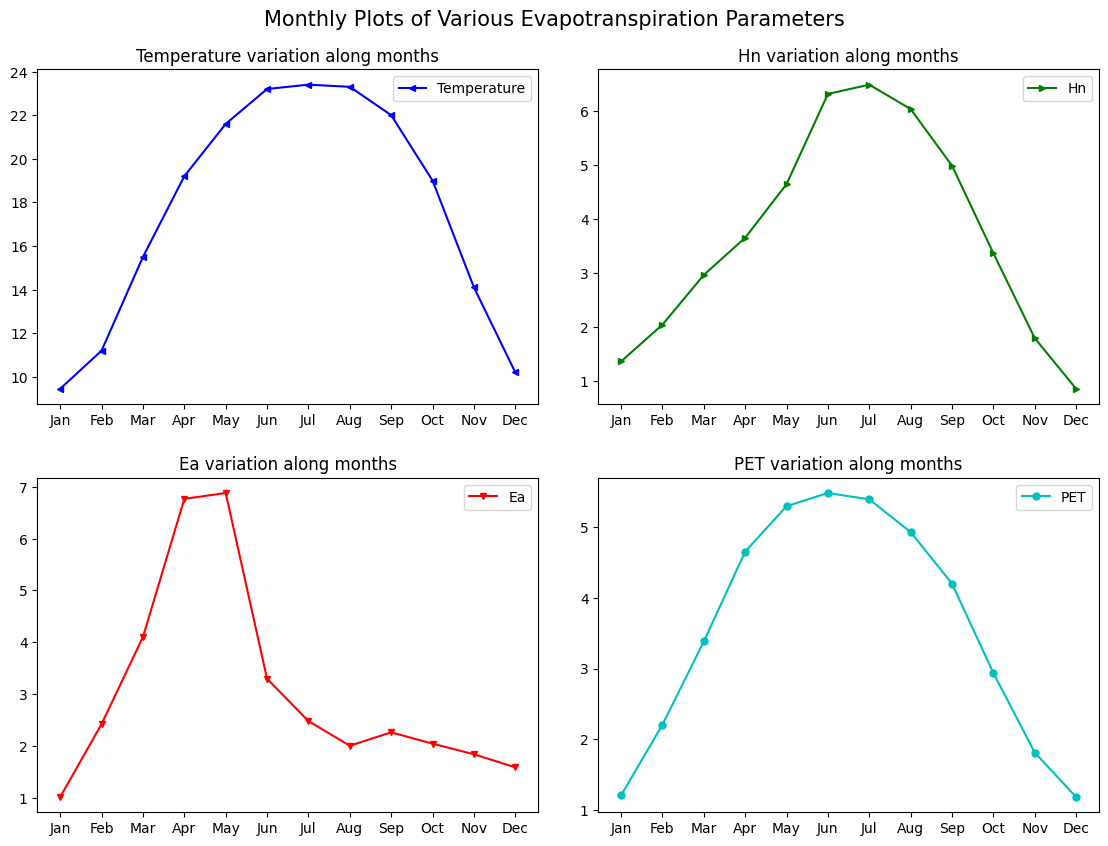

In [82]:
fig = plt.figure("Monthly Plots of various Parameters", figsize=(12,9)) #figsize allots total size of area where plots can be made
axes = list(range(4)) #to store each axes object
to_plot = {"Temperature":Ta_months[:-1], "Hn":Hn[:-1], "Ea":Ea[:-1], "PET":PET[:-1]}

for (n,(k,v)) in enumerate(to_plot.items()):
    axes[n]=fig.add_subplot(int(f"22{n+1}"))
    lines = axes[n].plot(months[:-1], v, label=k, c='bgrcmykbg'[n], marker="<>vo"[n], ms=5)
    axes[n].set_title(f"{k} variation along months")
    axes[n].legend(loc="upper right")

fig.tight_layout(pad=4, w_pad=3, h_pad=2) #to ensure good spacing of all figures
fig.suptitle(r"Monthly Plots of Various Evapotranspiration Parameters", fontsize = 15)
plt.show()

In [83]:
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Avg'],
    'ew': [8.895400, 10.006800, 13.232000, 16.727200, 19.396000, 21.369600, 21.635200, 21.502400, 19.860000, 16.524000, 12.098800, 9.342800, 15.182034],
    'A': [0.586800, 0.652800, 0.830000, 1.018000, 1.171600, 1.284800, 1.297600, 1.291200, 1.202000, 1.010000, 0.767600, 0.608800, 0.957167],
    'Ha': [9.006000, 10.896000, 12.964000, 14.888000, 15.934000, 16.346000, 16.090000, 15.300000, 13.698000, 11.652000, 9.562000, 8.428000, 12.897000],
    'N': [10.554000, 11.188000, 12.000000, 12.834000, 13.568000, 13.924000, 13.746000, 13.112000, 12.378000, 11.544000, 10.732000, 10.354000, 12.161167],
    'ea': [6.760504, 5.703876, 5.954400, 5.854520, 8.340280, 16.454592, 17.308160, 18.062016, 15.292200, 12.227760, 8.590148, 6.072820, 9.918929],
    'σT^4': [12.792705, 13.112707, 13.924491, 14.652675, 15.140040, 15.471637, 15.513467, 15.492541, 15.222435, 14.612599, 13.656167, 12.929123, 14.349993],
    'Hn': [1.360897, 2.040674, 2.960951, 3.648573, 4.640685, 6.309055, 6.481209, 6.028766, 4.981076, 3.362500, 1.790905, 0.855833, 3.625345],
    'Ea': [1.017041, 2.426371, 4.103758, 6.765223, 6.879115, 3.297151, 2.482038, 2.006891, 2.264867, 2.046681, 1.842042, 1.589574, 2.920901],
    'PET': [1.205299, 2.205081, 3.382443, 4.654279, 5.296026, 5.483666, 5.393137, 4.930574, 4.200186, 2.935629, 1.810705, 1.181180, 3.388441]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to Excel
excel_file = "output.xlsx"
df.to_excel(excel_file, index=False)

PET due to of average of PET of each month = 3.388441

PET due to average of Annual PET = 3.556517

Error(%) = 4.725862 (was calculated in excel)